## DataPreprocessing-0

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:/Final Version/Step 14 CombinedTraces/CombinedBenignMaliciousDataset.csv")
data.head()

C:\Users\N11894571\AppData\Local\Temp\ipykernel_44296\49516519.py:1: DtypeWarning: Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("D:/Final Version/Step 14 CombinedTraces/CombinedBenignMaliciousDataset.csv")


,Filename,Package_Name,Total System Calls,Unique System Calls,Unique System Calls List,Total Errors,Unique Errors,Unique Errors List,File Operations,Unique File Operations,...,Pattern 2,Pattern 3,Pattern 4,Pattern 5,Advanced Pattern 1,Advanced Pattern 2,Advanced Pattern 3,Advanced Pattern 4,Advanced Pattern 5,Level
0,1337x_strace_output_24584.24584,1337x,28644,47,"newfstatat, openat, fstat, write, close, renam...",3846,8,"ENOTTY, ENOENT, else, ESPIPE, ENETUNREACH, EIN...",25079,14,...,newfstatat -> openat -> fstat,lseek -> lseek -> lseek,fstat -> ioctl -> lseek,openat -> fstat -> ioctl,newfstatat -> newfstatat -> newfstatat -> no-e...,newfstatat -> newfstatat -> openat -> no-error...,newfstatat -> openat -> fstat -> no-error -> n...,lseek -> lseek -> lseek -> no-error -> no-fd,openat -> fstat -> ioctl -> no-error -> no-fd,0
1,3m_strace_output_11938.11938,3m,65205,49,"restart_syscall, read, newfstatat, futex, open...",5970,7,"ENOENT, EAGAIN, ENOTTY, ENETUNREACH, EINPROGRE...",52667,12,...,newfstatat -> openat -> fstat,geteuid -> chown -> utimensat,fstat -> ioctl -> lseek,openat -> fstat -> ioctl,newfstatat -> newfstatat -> newfstatat -> no-e...,newfstatat -> openat -> fstat -> no-error -> n...,geteuid -> chown -> utimensat -> no-error -> n...,fstat -> ioctl -> lseek -> no-error -> no-fd,openat -> fstat -> ioctl -> no-error -> no-fd,0
2,3-py_strace_output_52126.52126,3-py,11800,51,"fstat, brk, getdents64, close, newfstatat, ope...",1034,7,"ENOTTY, ENOENT, ESPIPE, ENETUNREACH, EINPROGRE...",9689,16,...,read -> read -> read,newfstatat -> openat -> fstat,newfstatat -> newfstatat -> openat,fstat -> ioctl -> lseek,newfstatat -> newfstatat -> newfstatat -> no-e...,read -> read -> read -> no-error -> no-fd,newfstatat -> openat -> fstat -> no-error -> n...,newfstatat -> newfstatat -> openat -> no-error...,openat -> fstat -> ioctl -> no-error -> no-fd,0
3,5345345345345345_strace_output_53409.53409,5345345345345345,10582,48,"newfstatat, openat, fstat, write, close, renam...",1002,7,"ENOENT, ENOTTY, else, ESPIPE, ENETUNREACH, EIN...",9410,15,...,newfstatat -> newfstatat -> openat,read -> read -> read,newfstatat -> openat -> fstat,close -> newfstatat -> newfstatat,newfstatat -> newfstatat -> newfstatat -> no-e...,newfstatat -> newfstatat -> openat -> no-error...,read -> read -> read -> no-error -> no-fd,newfstatat -> openat -> fstat -> no-error -> n...,close -> newfstatat -> newfstatat -> no-error ...,0
4,aadhaar_strace_output_199588.199588,aadhaar,2825,45,"restart_syscall, read, newfstatat, openat, fst...",206,7,"ENOENT, EINPROGRESS, EAGAIN, ENOTTY, ENETUNREA...",2110,13,...,read -> read -> read,newfstatat -> openat -> fstat,ioctl -> ioctl -> ioctl,lseek -> lseek -> lseek,newfstatat -> newfstatat -> newfstatat -> no-e...,read -> read -> read -> no-error -> no-fd,newfstatat -> openat -> fstat -> no-error -> n...,lseek -> lseek -> lseek -> no-error -> no-fd,ioctl -> ioctl -> ioctl -> no-error -> no-fd,0


In [3]:
no_attributes = data.shape[1] - 1
print(no_attributes)

188


In [4]:
dt = data.iloc[:, :no_attributes]
dt.head()

,Filename,Package_Name,Total System Calls,Unique System Calls,Unique System Calls List,Total Errors,Unique Errors,Unique Errors List,File Operations,Unique File Operations,...,Pattern 1,Pattern 2,Pattern 3,Pattern 4,Pattern 5,Advanced Pattern 1,Advanced Pattern 2,Advanced Pattern 3,Advanced Pattern 4,Advanced Pattern 5
0,1337x_strace_output_24584.24584,1337x,28644,47,"newfstatat, openat, fstat, write, close, renam...",3846,8,"ENOTTY, ENOENT, else, ESPIPE, ENETUNREACH, EIN...",25079,14,...,newfstatat -> newfstatat -> newfstatat,newfstatat -> openat -> fstat,lseek -> lseek -> lseek,fstat -> ioctl -> lseek,openat -> fstat -> ioctl,newfstatat -> newfstatat -> newfstatat -> no-e...,newfstatat -> newfstatat -> openat -> no-error...,newfstatat -> openat -> fstat -> no-error -> n...,lseek -> lseek -> lseek -> no-error -> no-fd,openat -> fstat -> ioctl -> no-error -> no-fd
1,3m_strace_output_11938.11938,3m,65205,49,"restart_syscall, read, newfstatat, futex, open...",5970,7,"ENOENT, EAGAIN, ENOTTY, ENETUNREACH, EINPROGRE...",52667,12,...,newfstatat -> newfstatat -> newfstatat,newfstatat -> openat -> fstat,geteuid -> chown -> utimensat,fstat -> ioctl -> lseek,openat -> fstat -> ioctl,newfstatat -> newfstatat -> newfstatat -> no-e...,newfstatat -> openat -> fstat -> no-error -> n...,geteuid -> chown -> utimensat -> no-error -> n...,fstat -> ioctl -> lseek -> no-error -> no-fd,openat -> fstat -> ioctl -> no-error -> no-fd
2,3-py_strace_output_52126.52126,3-py,11800,51,"fstat, brk, getdents64, close, newfstatat, ope...",1034,7,"ENOTTY, ENOENT, ESPIPE, ENETUNREACH, EINPROGRE...",9689,16,...,newfstatat -> newfstatat -> newfstatat,read -> read -> read,newfstatat -> openat -> fstat,newfstatat -> newfstatat -> openat,fstat -> ioctl -> lseek,newfstatat -> newfstatat -> newfstatat -> no-e...,read -> read -> read -> no-error -> no-fd,newfstatat -> openat -> fstat -> no-error -> n...,newfstatat -> newfstatat -> openat -> no-error...,openat -> fstat -> ioctl -> no-error -> no-fd
3,5345345345345345_strace_output_53409.53409,5345345345345345,10582,48,"newfstatat, openat, fstat, write, close, renam...",1002,7,"ENOENT, ENOTTY, else, ESPIPE, ENETUNREACH, EIN...",9410,15,...,newfstatat -> newfstatat -> newfstatat,newfstatat -> newfstatat -> openat,read -> read -> read,newfstatat -> openat -> fstat,close -> newfstatat -> newfstatat,newfstatat -> newfstatat -> newfstatat -> no-e...,newfstatat -> newfstatat -> openat -> no-error...,read -> read -> read -> no-error -> no-fd,newfstatat -> openat -> fstat -> no-error -> n...,close -> newfstatat -> newfstatat -> no-error ...
4,aadhaar_strace_output_199588.199588,aadhaar,2825,45,"restart_syscall, read, newfstatat, openat, fst...",206,7,"ENOENT, EINPROGRESS, EAGAIN, ENOTTY, ENETUNREA...",2110,13,...,newfstatat -> newfstatat -> newfstatat,read -> read -> read,newfstatat -> openat -> fstat,ioctl -> ioctl -> ioctl,lseek -> lseek -> lseek,newfstatat -> newfstatat -> newfstatat -> no-e...,read -> read -> read -> no-error -> no-fd,newfstatat -> openat -> fstat -> no-error -> n...,lseek -> lseek -> lseek -> no-error -> no-fd,ioctl -> ioctl -> ioctl -> no-error -> no-fd


In [5]:
orignal_dt = data.copy()

In [6]:
num_conv = dt.select_dtypes(include=['object']).columns
str_att = dt[num_conv].apply(lambda x: pd.factorize(x)[0])
str_att

,Filename,Package_Name,Unique System Calls List,Unique Errors List,Unique File Operations List,Unique Memory Operations List,Unique Network Operations List,Unique Process Management Operations List,Unique I/O Operations List,Unique Time Operations List,...,Pattern 1,Pattern 2,Pattern 3,Pattern 4,Pattern 5,Advanced Pattern 1,Advanced Pattern 2,Advanced Pattern 3,Advanced Pattern 4,Advanced Pattern 5
0,0,0,0,0,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,0,-1,...,0,0,1,0,0,0,1,1,1,0
2,2,2,2,2,2,0,0,0,0,-1,...,0,1,2,1,1,0,2,0,2,0
3,3,3,3,3,3,0,0,0,0,-1,...,0,2,3,2,2,0,0,2,3,1
4,4,4,4,4,4,1,0,0,0,-1,...,0,1,2,3,3,0,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14266,14266,14266,5322,58,157,18,-1,2,1,-1,...,0,0,8,20,23,0,1,3,27,30
14267,14267,14267,468,-1,-1,7,-1,-1,-1,-1,...,8,-1,-1,-1,-1,-1,-1,-1,-1,-1
14268,14268,14268,4420,55,162,15,7,3,0,-1,...,0,1,2,17,18,0,2,0,0,54
14269,14269,14269,6925,120,222,16,7,0,0,-1,...,0,0,8,11,2,0,1,3,7,1


In [7]:
num_att = dt.select_dtypes(include=[np.number])
num_att.head()

,Total System Calls,Unique System Calls,Total Errors,Unique Errors,File Operations,Unique File Operations,Memory Operations,Unique Memory Operations,Network Operations,Unique Network Operations,...,Sys,Etc,Other,Total_Entries,Unique_C-COMM_Count,Python_Related_Count,Unique_LADDR_Count,Unique_RADDR_Count,Unique_LPORT_Count,Unique_RPORT_Count
0,28644,47,3846,8,25079,14,355,5,117,9,...,54,33,118,6929,28,445,7,1230,1380,171
1,65205,49,5970,7,52667,12,36,5,74,9,...,67,105,3460,656,15,263,1,15,134,2
2,11800,51,1034,7,9689,16,198,5,201,9,...,1211,134,1709,1312,5,487,2,54,269,21
3,10582,48,1002,7,9410,15,202,5,102,9,...,981,579,24742,2233,12,246,2,361,452,76
4,2825,45,206,7,2110,13,14,4,158,9,...,1312,276,21513,575,7,206,3,34,123,14


In [8]:
out = pd.concat([str_att, num_att], axis=1)
out.head()

,Filename,Package_Name,Unique System Calls List,Unique Errors List,Unique File Operations List,Unique Memory Operations List,Unique Network Operations List,Unique Process Management Operations List,Unique I/O Operations List,Unique Time Operations List,...,Sys,Etc,Other,Total_Entries,Unique_C-COMM_Count,Python_Related_Count,Unique_LADDR_Count,Unique_RADDR_Count,Unique_LPORT_Count,Unique_RPORT_Count
0,0,0,0,0,0,0,0,0,0,-1,...,54,33,118,6929,28,445,7,1230,1380,171
1,1,1,1,1,1,0,0,0,0,-1,...,67,105,3460,656,15,263,1,15,134,2
2,2,2,2,2,2,0,0,0,0,-1,...,1211,134,1709,1312,5,487,2,54,269,21
3,3,3,3,3,3,0,0,0,0,-1,...,981,579,24742,2233,12,246,2,361,452,76
4,4,4,4,4,4,1,0,0,0,-1,...,1312,276,21513,575,7,206,3,34,123,14


In [9]:
scaler = MinMaxScaler()
dt_n = pd.DataFrame(scaler.fit_transform(out), columns=out.columns)
dt_n.head()

C:\Python312\Lib\site-packages\sklearn\utils\_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Python312\Lib\site-packages\sklearn\utils\_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


,Filename,Package_Name,Unique System Calls List,Unique Errors List,Unique File Operations List,Unique Memory Operations List,Unique Network Operations List,Unique Process Management Operations List,Unique I/O Operations List,Unique Time Operations List,...,Sys,Etc,Other,Total_Entries,Unique_C-COMM_Count,Python_Related_Count,Unique_LADDR_Count,Unique_RADDR_Count,Unique_LPORT_Count,Unique_RPORT_Count
0,0.00000,0.00000,0.000000,0.001387,0.003521,0.034483,0.04,0.055556,0.25,0.0,...,0.005549,0.000927,0.000295,0.312061,0.250000,0.133473,0.388889,0.365093,0.247667,0.364606
1,0.00007,0.00007,0.000144,0.002774,0.007042,0.034483,0.04,0.055556,0.25,0.0,...,0.006885,0.002949,0.008646,0.029544,0.133929,0.078884,0.055556,0.004452,0.024049,0.004264
2,0.00014,0.00014,0.000289,0.004161,0.010563,0.034483,0.04,0.055556,0.25,0.0,...,0.124448,0.003764,0.004270,0.059088,0.044643,0.146071,0.111111,0.016028,0.048277,0.044776
3,0.00021,0.00021,0.000433,0.005548,0.014085,0.034483,0.04,0.055556,0.25,0.0,...,0.100812,0.016262,0.061824,0.100567,0.107143,0.073785,0.111111,0.107153,0.081120,0.162047
4,0.00028,0.00028,0.000578,0.006935,0.017606,0.068966,0.04,0.055556,0.25,0.0,...,0.134827,0.007752,0.053756,0.025896,0.062500,0.061788,0.166667,0.010092,0.022075,0.029851


In [10]:
all_dt = pd.concat([dt_n, data.iloc[:, -1]], axis=1)
all_dt.columns = list(all_dt.columns[:-1]) + ['Level']
all_dt.head()

,Filename,Package_Name,Unique System Calls List,Unique Errors List,Unique File Operations List,Unique Memory Operations List,Unique Network Operations List,Unique Process Management Operations List,Unique I/O Operations List,Unique Time Operations List,...,Etc,Other,Total_Entries,Unique_C-COMM_Count,Python_Related_Count,Unique_LADDR_Count,Unique_RADDR_Count,Unique_LPORT_Count,Unique_RPORT_Count,Level
0,0.00000,0.00000,0.000000,0.001387,0.003521,0.034483,0.04,0.055556,0.25,0.0,...,0.000927,0.000295,0.312061,0.250000,0.133473,0.388889,0.365093,0.247667,0.364606,0
1,0.00007,0.00007,0.000144,0.002774,0.007042,0.034483,0.04,0.055556,0.25,0.0,...,0.002949,0.008646,0.029544,0.133929,0.078884,0.055556,0.004452,0.024049,0.004264,0
2,0.00014,0.00014,0.000289,0.004161,0.010563,0.034483,0.04,0.055556,0.25,0.0,...,0.003764,0.004270,0.059088,0.044643,0.146071,0.111111,0.016028,0.048277,0.044776,0
3,0.00021,0.00021,0.000433,0.005548,0.014085,0.034483,0.04,0.055556,0.25,0.0,...,0.016262,0.061824,0.100567,0.107143,0.073785,0.111111,0.107153,0.081120,0.162047,0
4,0.00028,0.00028,0.000578,0.006935,0.017606,0.068966,0.04,0.055556,0.25,0.0,...,0.007752,0.053756,0.025896,0.062500,0.061788,0.166667,0.010092,0.022075,0.029851,0


In [11]:
np.random.seed(10)

In [12]:
correlationMatrix = dt_n.corr()
correlationMatrix

,Filename,Package_Name,Unique System Calls List,Unique Errors List,Unique File Operations List,Unique Memory Operations List,Unique Network Operations List,Unique Process Management Operations List,Unique I/O Operations List,Unique Time Operations List,...,Sys,Etc,Other,Total_Entries,Unique_C-COMM_Count,Python_Related_Count,Unique_LADDR_Count,Unique_RADDR_Count,Unique_LPORT_Count,Unique_RPORT_Count
Filename,1.000000,1.000000,0.857762,0.277111,0.748982,0.762748,0.552434,0.249126,0.011391,-0.185287,...,0.000057,0.246651,0.318249,-0.251109,0.018479,-0.133506,0.055155,-0.212162,-0.223906,-0.251844
Package_Name,1.000000,1.000000,0.857762,0.277111,0.748982,0.762748,0.552434,0.249126,0.011391,-0.185287,...,0.000057,0.246651,0.318249,-0.251109,0.018479,-0.133506,0.055155,-0.212162,-0.223906,-0.251844
Unique System Calls List,0.857762,0.857762,1.000000,0.352346,0.787158,0.757410,0.583529,0.277165,0.136428,-0.149326,...,0.020449,0.221229,0.274568,-0.215335,0.010589,-0.086473,0.048939,-0.196858,-0.191898,-0.234582
Unique Errors List,0.277111,0.277111,0.352346,1.000000,0.346626,0.382683,0.321299,0.268904,0.205565,-0.054906,...,0.043014,0.080424,0.076189,-0.064031,-0.027097,0.000301,0.003026,-0.074848,-0.056164,-0.084108
Unique File Operations List,0.748982,0.748982,0.787158,0.346626,1.000000,0.924284,0.747376,0.354360,0.303406,-0.185969,...,0.012160,0.131647,0.246279,-0.181586,-0.038418,-0.042054,0.035379,-0.185788,-0.162871,-0.228354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Python_Related_Count,-0.133506,-0.133506,-0.086473,0.000301,-0.042054,-0.034698,0.041035,-0.040453,-0.024045,0.032774,...,0.171105,0.010269,-0.018694,0.543140,0.130087,1.000000,0.148096,0.139894,0.539791,0.253051
Unique_LADDR_Count,0.055155,0.055155,0.048939,0.003026,0.035379,0.048140,0.012024,-0.034188,-0.045606,-0.075739,...,-0.037059,0.075785,0.115359,0.599735,0.707547,0.148096,1.000000,0.672286,0.628692,0.603866
Unique_RADDR_Count,-0.212162,-0.212162,-0.196858,-0.074848,-0.185788,-0.184947,-0.129263,-0.066977,-0.010547,0.015502,...,-0.094938,-0.063003,-0.102845,0.880123,0.648610,0.139894,0.672286,1.000000,0.873627,0.833638
Unique_LPORT_Count,-0.223906,-0.223906,-0.191898,-0.056164,-0.162871,-0.158105,-0.079948,-0.069534,-0.019549,0.015423,...,-0.013739,-0.044807,-0.093049,0.984713,0.630541,0.539791,0.628692,0.873627,1.000000,0.780316


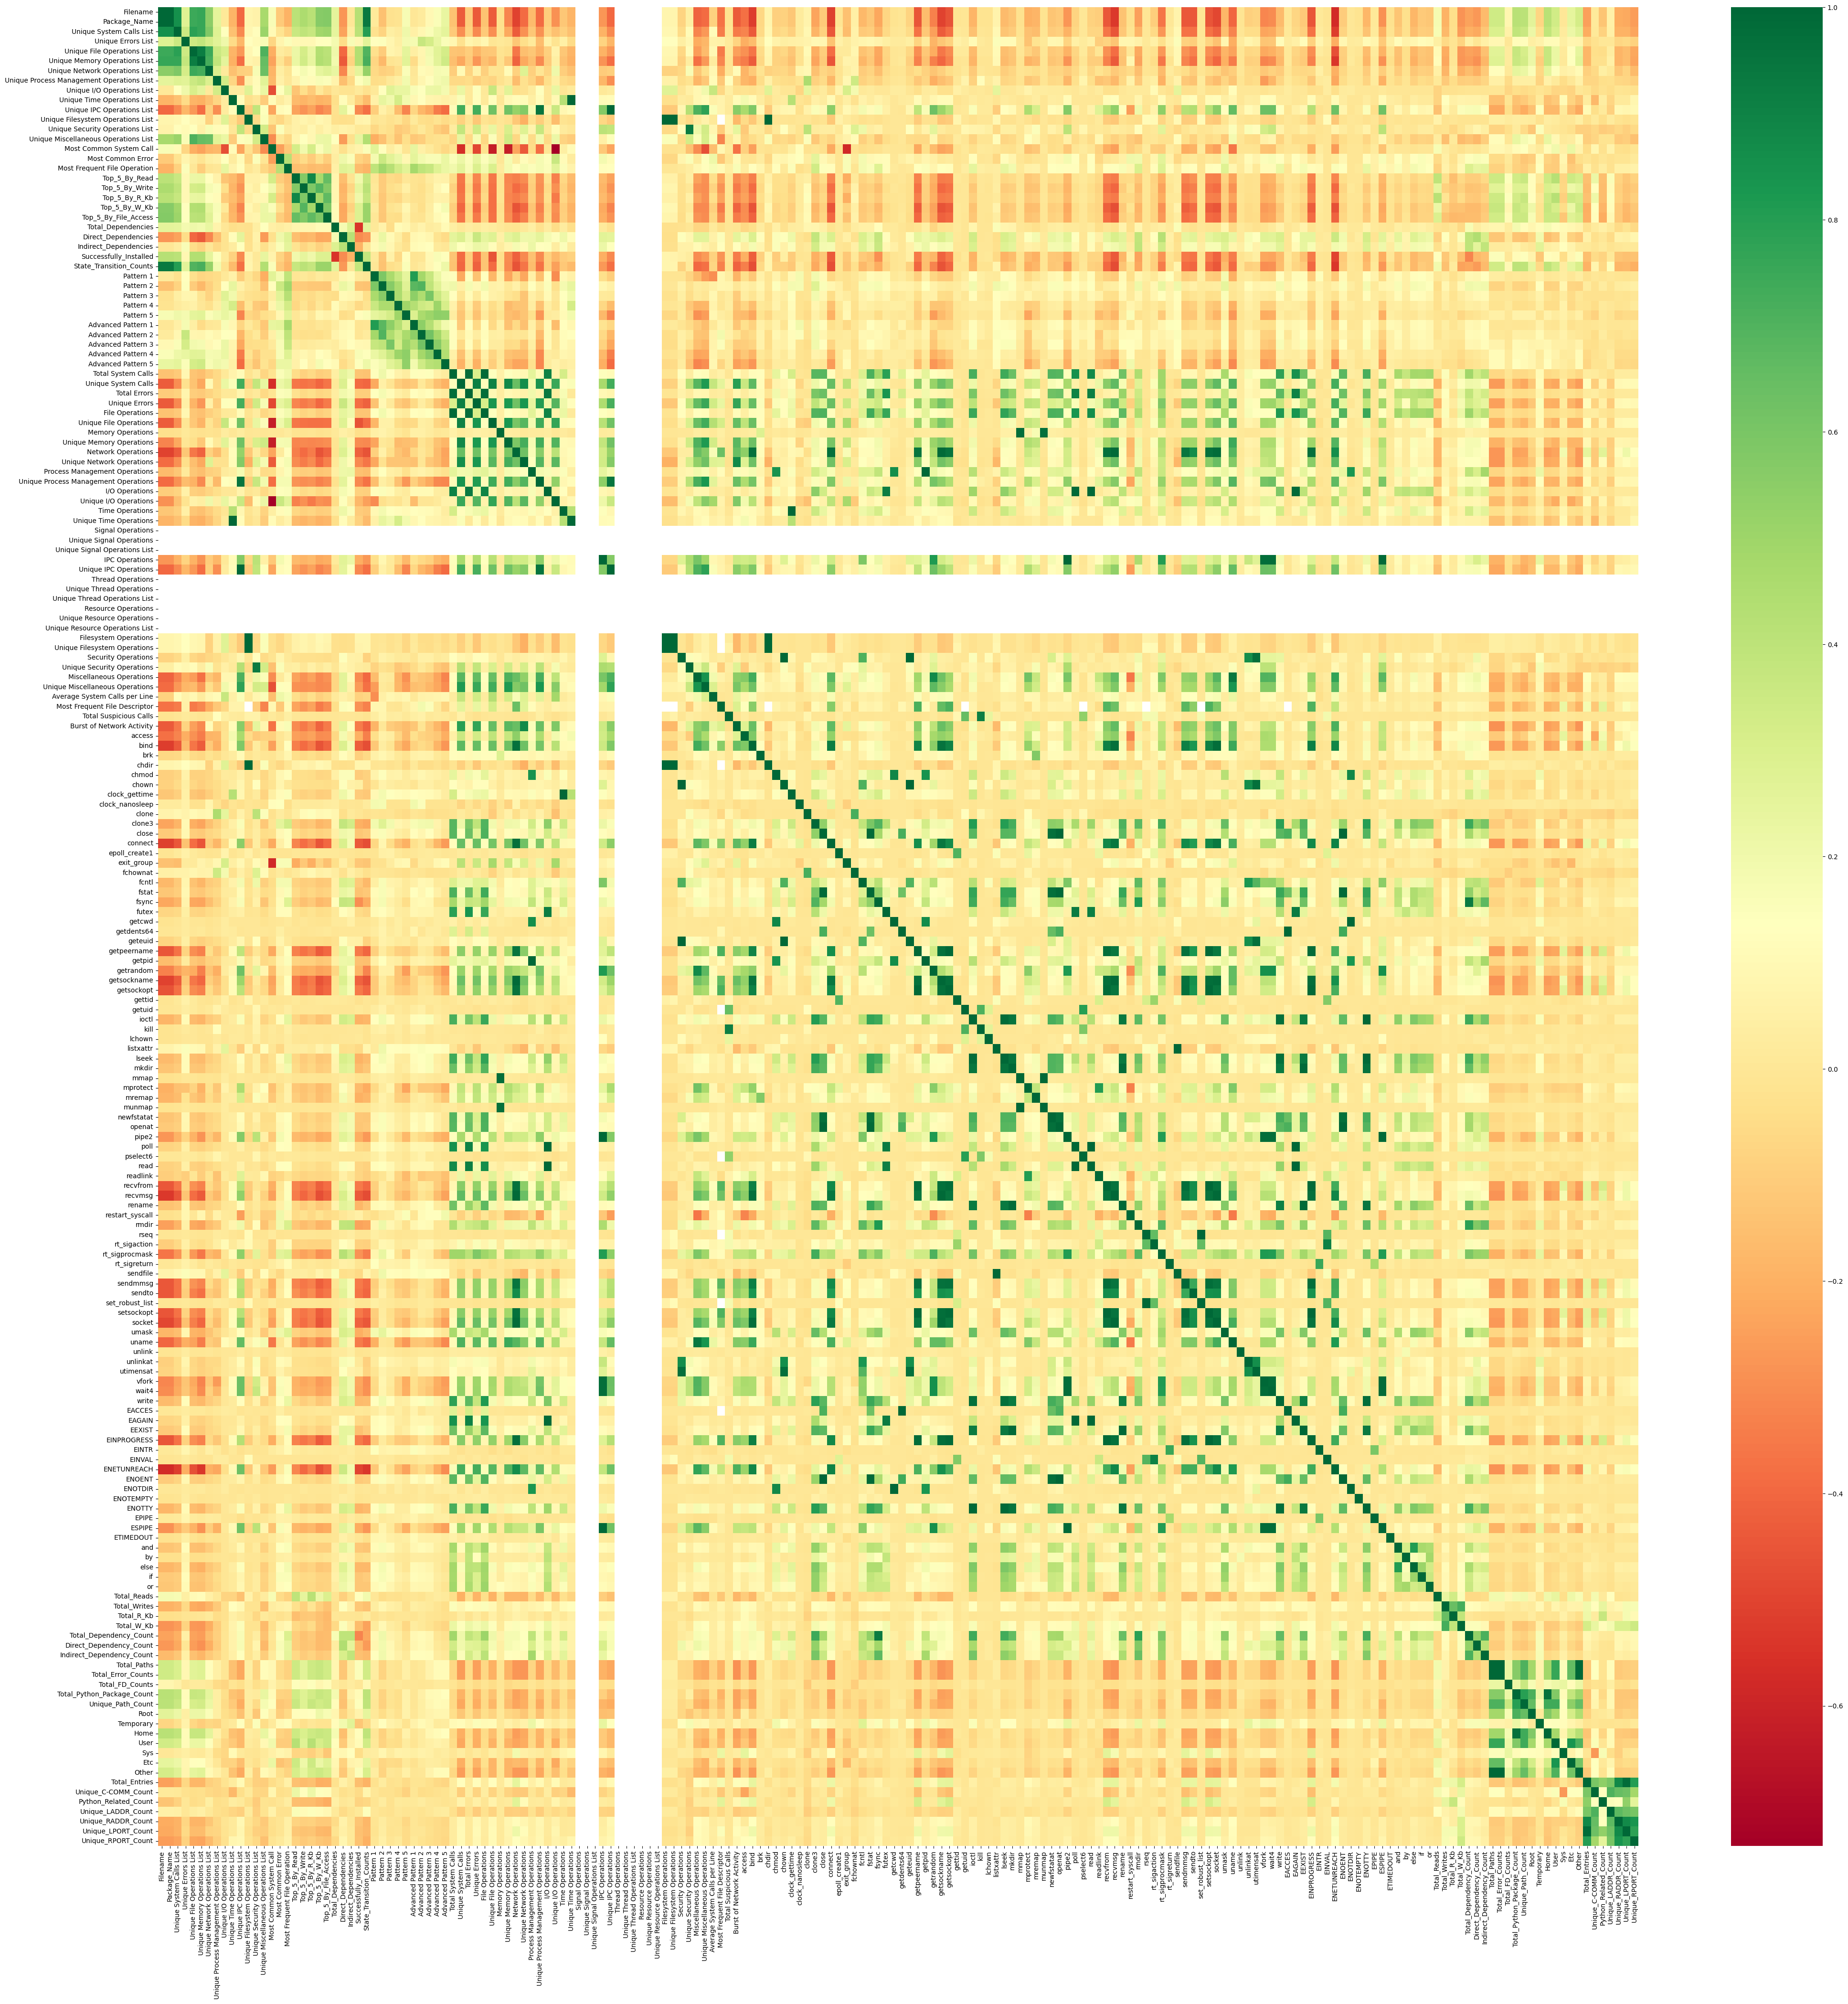

In [13]:
plt.figure(figsize=(50, 50))
sns.heatmap(correlationMatrix, cmap='RdYlGn', annot=False)
plt.show()

In [25]:
highlyCorrelated = [i for i, corr in enumerate(np.abs(correlationMatrix).mean()) if corr > 0.25]
print(highlyCorrelated)

[40, 75, 121, 127, 149]


In [26]:
highly_correlated_features = dt_n.columns[highlyCorrelated]
highly_correlated_features.tolist()

['Unique Errors', 'bind', 'recvmsg', 'rt_sigprocmask', 'ENETUNREACH']

In [27]:
highly_corr_data = dt_n[highly_correlated_features]
highly_corr_matrix = highly_corr_data.corr()
highly_corr_matrix

,Unique Errors,bind,recvmsg,rt_sigprocmask,ENETUNREACH
Unique Errors,1.000000,0.654348,0.644740,0.583461,0.723561
bind,0.654348,1.000000,0.969214,0.441310,0.886081
recvmsg,0.644740,0.969214,1.000000,0.427032,0.885346
rt_sigprocmask,0.583461,0.441310,0.427032,1.000000,0.481553
ENETUNREACH,0.723561,0.886081,0.885346,0.481553,1.000000


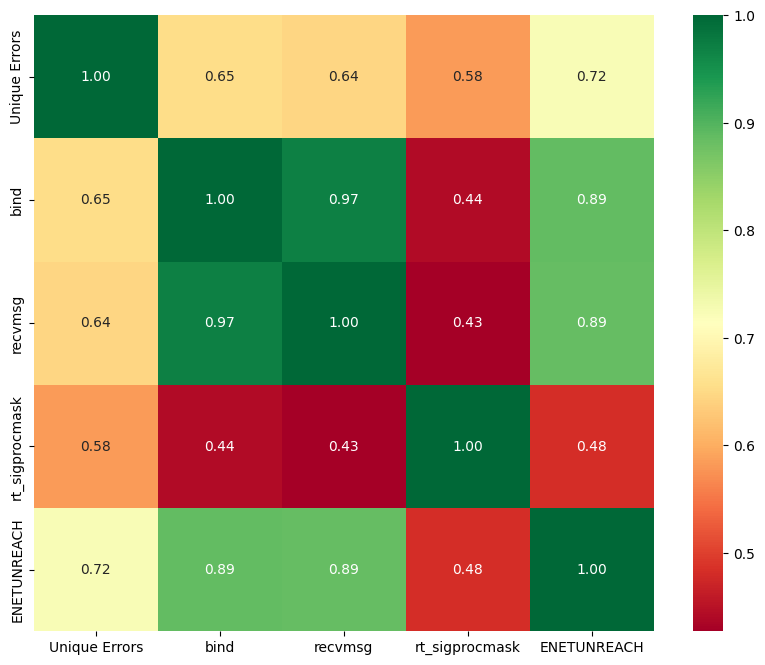

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(highly_corr_matrix, cmap='RdYlGn', annot=True, fmt=".2f")
plt.show()

In [33]:
dt_corr = dt_n.drop(dt_n.columns[highlyCorrelated], axis=1)
dt_corr_m = dt_corr.corr()
dt_corr_m

,Filename,Package_Name,Unique System Calls List,Unique Errors List,Unique File Operations List,Unique Memory Operations List,Unique Network Operations List,Unique Process Management Operations List,Unique I/O Operations List,Unique Time Operations List,...,Sys,Etc,Other,Total_Entries,Unique_C-COMM_Count,Python_Related_Count,Unique_LADDR_Count,Unique_RADDR_Count,Unique_LPORT_Count,Unique_RPORT_Count
Filename,1.000000,1.000000,0.857762,0.277111,0.748982,0.762748,0.552434,0.249126,0.011391,-0.185287,...,0.000057,0.246651,0.318249,-0.251109,0.018479,-0.133506,0.055155,-0.212162,-0.223906,-0.251844
Package_Name,1.000000,1.000000,0.857762,0.277111,0.748982,0.762748,0.552434,0.249126,0.011391,-0.185287,...,0.000057,0.246651,0.318249,-0.251109,0.018479,-0.133506,0.055155,-0.212162,-0.223906,-0.251844
Unique System Calls List,0.857762,0.857762,1.000000,0.352346,0.787158,0.757410,0.583529,0.277165,0.136428,-0.149326,...,0.020449,0.221229,0.274568,-0.215335,0.010589,-0.086473,0.048939,-0.196858,-0.191898,-0.234582
Unique Errors List,0.277111,0.277111,0.352346,1.000000,0.346626,0.382683,0.321299,0.268904,0.205565,-0.054906,...,0.043014,0.080424,0.076189,-0.064031,-0.027097,0.000301,0.003026,-0.074848,-0.056164,-0.084108
Unique File Operations List,0.748982,0.748982,0.787158,0.346626,1.000000,0.924284,0.747376,0.354360,0.303406,-0.185969,...,0.012160,0.131647,0.246279,-0.181586,-0.038418,-0.042054,0.035379,-0.185788,-0.162871,-0.228354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Python_Related_Count,-0.133506,-0.133506,-0.086473,0.000301,-0.042054,-0.034698,0.041035,-0.040453,-0.024045,0.032774,...,0.171105,0.010269,-0.018694,0.543140,0.130087,1.000000,0.148096,0.139894,0.539791,0.253051
Unique_LADDR_Count,0.055155,0.055155,0.048939,0.003026,0.035379,0.048140,0.012024,-0.034188,-0.045606,-0.075739,...,-0.037059,0.075785,0.115359,0.599735,0.707547,0.148096,1.000000,0.672286,0.628692,0.603866
Unique_RADDR_Count,-0.212162,-0.212162,-0.196858,-0.074848,-0.185788,-0.184947,-0.129263,-0.066977,-0.010547,0.015502,...,-0.094938,-0.063003,-0.102845,0.880123,0.648610,0.139894,0.672286,1.000000,0.873627,0.833638
Unique_LPORT_Count,-0.223906,-0.223906,-0.191898,-0.056164,-0.162871,-0.158105,-0.079948,-0.069534,-0.019549,0.015423,...,-0.013739,-0.044807,-0.093049,0.984713,0.630541,0.539791,0.628692,0.873627,1.000000,0.780316


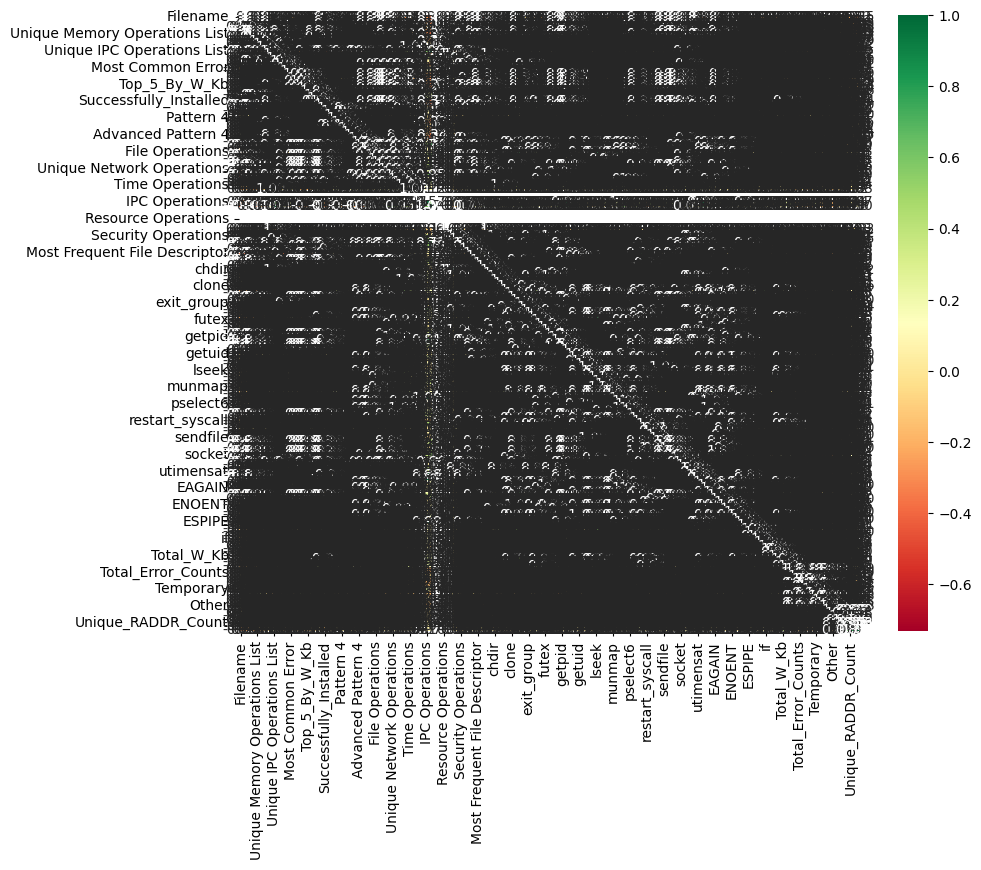

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(dt_corr_m, cmap='RdYlGn', annot=True, fmt=".2f")
plt.show()

In [35]:
data_corr = pd.concat([dt_corr, data.iloc[:, -1]], axis=1)
data_corr.columns = list(data_corr.columns[:-1]) + ['target']
data_corr.head()

,Filename,Package_Name,Unique System Calls List,Unique Errors List,Unique File Operations List,Unique Memory Operations List,Unique Network Operations List,Unique Process Management Operations List,Unique I/O Operations List,Unique Time Operations List,...,Etc,Other,Total_Entries,Unique_C-COMM_Count,Python_Related_Count,Unique_LADDR_Count,Unique_RADDR_Count,Unique_LPORT_Count,Unique_RPORT_Count,target
0,0.00000,0.00000,0.000000,0.001387,0.003521,0.034483,0.04,0.055556,0.25,0.0,...,0.000927,0.000295,0.312061,0.250000,0.133473,0.388889,0.365093,0.247667,0.364606,0
1,0.00007,0.00007,0.000144,0.002774,0.007042,0.034483,0.04,0.055556,0.25,0.0,...,0.002949,0.008646,0.029544,0.133929,0.078884,0.055556,0.004452,0.024049,0.004264,0
2,0.00014,0.00014,0.000289,0.004161,0.010563,0.034483,0.04,0.055556,0.25,0.0,...,0.003764,0.004270,0.059088,0.044643,0.146071,0.111111,0.016028,0.048277,0.044776,0
3,0.00021,0.00021,0.000433,0.005548,0.014085,0.034483,0.04,0.055556,0.25,0.0,...,0.016262,0.061824,0.100567,0.107143,0.073785,0.111111,0.107153,0.081120,0.162047,0
4,0.00028,0.00028,0.000578,0.006935,0.017606,0.068966,0.04,0.055556,0.25,0.0,...,0.007752,0.053756,0.025896,0.062500,0.061788,0.166667,0.010092,0.022075,0.029851,0


In [36]:
intrain, _ = train_test_split(data_corr, test_size=0.3, random_state=3033, stratify=data_corr['target'])

orignal_train, orignal_test = train_test_split(orignal_dt, test_size=0.3, random_state=3033, stratify=orignal_dt.iloc[:, -1])
filtered_train, filtered_test = train_test_split(data_corr, test_size=0.3, random_state=3033, stratify=data_corr['target'])

In [37]:
print("Original Dataset Summary:")
print(data.describe())

print("\nFiltered Training Dataset Summary:")
print(filtered_train.describe())

print("\nFiltered Testing Dataset Summary:")
print(filtered_test.describe())

print("\nOriginal Training Dataset Summary:")
print(orignal_train.describe())

print("\nOriginal Testing Dataset Summary:")
print(orignal_test.describe())

# Save the new dataset to a CSV file
all_dt.to_csv('NewPreprocessedDataset.csv', index=False)

Original Dataset Summary:
       Total System Calls  Unique System Calls  Total Errors  Unique Errors  \
count        1.427100e+04         14271.000000  1.427100e+04   14271.000000   
mean         2.599170e+04            40.093897  4.305069e+03       5.976526   
std          1.024832e+05            12.250579  2.411742e+04       2.154397   
min          1.000000e+00             1.000000  0.000000e+00       0.000000   
25%          2.234000e+03            37.000000  1.520000e+02       5.000000   
50%          7.862000e+03            46.000000  6.770000e+02       7.000000   
75%          1.837950e+04            48.000000  2.675000e+03       7.000000   
max          4.887238e+06           273.000000  1.212070e+06      16.000000   

       File Operations  Unique File Operations  Memory Operations  \
count     1.427100e+04            14271.000000       14271.000000   
mean      1.996390e+04               11.656646         116.729101   
std       7.765089e+04                3.237412        1